In [201]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data

In [202]:
# Reading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [203]:
telecom.shape

(99999, 226)

In [204]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [205]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handling missing values in Columns


In [206]:
# Cheking percent of missing values in columns
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [207]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(telecom_missing_columns.index[telecom_missing_columns['null'] > 30])

In [208]:
# Delete the columns having more than 30% missing values
telecom = telecom.drop(col_list_missing_30, axis=1)

In [209]:
telecom.shape

(99999, 186)

## Deleting the date columns as the date columns are not required in our analysis


In [210]:
# List the date columns
date_cols = [k for k in telecom.columns.to_list() if 'date' in k]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [211]:
# Dropping date columns
telecom = telecom.drop(date_cols, axis=1)

## Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.



In [212]:
# Drop circle_id column
telecom = telecom.drop('circle_id', axis=1)

In [213]:
telecom.shape

(99999, 177)

### Filter high-value customers


Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [214]:
telecom['avg_rech_amt_6_7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

In [215]:
## Finding the 70th percentile of the avg_rech_amt_6_7
X = telecom['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [216]:
## Filter the customers, who have recharged more than or equal to X.
telecom = telecom[telecom['avg_rech_amt_6_7'] >= X]
telecom.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [217]:
telecom.shape

(30011, 178)

### We can see that we have around 30,000 Rows after filtering

## Handling missing values in Rows

In [218]:
# Count the rows having more than 50% missing values
telecom_missing_rows_50 = telecom[(telecom.isnull().sum(axis=1)) > (len(telecom.columns)//2)]
telecom_missing_rows_50.shape

(114, 178)

In [219]:
# Deleting the rows having more than 50% missing values
telecom = telecom.drop(telecom_missing_rows_50.index)
telecom.shape

(29897, 178)

In [220]:
# Checking the missing values in columns again
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


## It seems MOU for all the types of calls for the month of September month (9) have missing values together for any particular record.
## 
Lets check the records for the MOU for Sep(9), in which these coulmns have missing values togethe



In [221]:
# Listing the columns of MOU Sep(9)
print(((telecom_missing_columns[telecom_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [222]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
telecom_null_mou_9 = telecom[(telecom['loc_og_t2m_mou_9'].isnull()) & (telecom['loc_ic_t2f_mou_9'].isnull()) & (telecom['roam_og_mou_9'].isnull()) & (telecom['std_ic_t2m_mou_9'].isnull()) &
  (telecom['loc_og_t2t_mou_9'].isnull()) & (telecom['std_ic_t2t_mou_9'].isnull()) & (telecom['loc_og_t2f_mou_9'].isnull()) & (telecom['loc_ic_mou_9'].isnull()) &
  (telecom['loc_og_t2c_mou_9'].isnull()) & (telecom['loc_og_mou_9'].isnull()) & (telecom['std_og_t2t_mou_9'].isnull()) & (telecom['roam_ic_mou_9'].isnull()) &
  (telecom['loc_ic_t2m_mou_9'].isnull()) & (telecom['std_og_t2m_mou_9'].isnull()) & (telecom['loc_ic_t2t_mou_9'].isnull()) & (telecom['std_og_t2f_mou_9'].isnull()) & 
  (telecom['std_og_t2c_mou_9'].isnull()) & (telecom['og_others_9'].isnull()) & (telecom['std_og_mou_9'].isnull()) & (telecom['spl_og_mou_9'].isnull()) & 
  (telecom['std_ic_t2f_mou_9'].isnull()) & (telecom['isd_og_mou_9'].isnull()) & (telecom['std_ic_mou_9'].isnull()) & (telecom['offnet_mou_9'].isnull()) & 
  (telecom['isd_ic_mou_9'].isnull()) & (telecom['ic_others_9'].isnull()) & (telecom['std_ic_t2o_mou_9'].isnull()) & (telecom['onnet_mou_9'].isnull()) & 
  (telecom['spl_ic_mou_9'].isnull())]

telecom_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [223]:
telecom_null_mou_9.shape

(1590, 178)

In [224]:
# Deleting the records for which MOU for Sep(9) are null
telecom= telecom.drop(telecom_null_mou_9.index)

In [225]:
# Again Cheking percent of missing values in columns
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


### It seems MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.



In [226]:
# Listing the columns of MOU Aug(8)
print(((telecom_missing_columns[telecom_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [227]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
telecom_null_mou_8 = telecom[(telecom['loc_og_t2m_mou_8'].isnull()) & (telecom['loc_ic_t2f_mou_8'].isnull()) & (telecom['roam_og_mou_8'].isnull()) & (telecom['std_ic_t2m_mou_8'].isnull()) &
  (telecom['loc_og_t2t_mou_8'].isnull()) & (telecom['std_ic_t2t_mou_8'].isnull()) & (telecom['loc_og_t2f_mou_8'].isnull()) & (telecom['loc_ic_mou_8'].isnull()) &
  (telecom['loc_og_t2c_mou_8'].isnull()) & (telecom['loc_og_mou_8'].isnull()) & (telecom['std_og_t2t_mou_8'].isnull()) & (telecom['roam_ic_mou_8'].isnull()) &
  (telecom['loc_ic_t2m_mou_8'].isnull()) & (telecom['std_og_t2m_mou_8'].isnull()) & (telecom['loc_ic_t2t_mou_8'].isnull()) & (telecom['std_og_t2f_mou_8'].isnull()) & 
  (telecom['std_og_t2c_mou_8'].isnull()) & (telecom['og_others_8'].isnull()) & (telecom['std_og_mou_8'].isnull()) & (telecom['spl_og_mou_8'].isnull()) & 
  (telecom['std_ic_t2f_mou_8'].isnull()) & (telecom['isd_og_mou_8'].isnull()) & (telecom['std_ic_mou_8'].isnull()) & (telecom['offnet_mou_8'].isnull()) & 
  (telecom['isd_ic_mou_8'].isnull()) & (telecom['ic_others_8'].isnull()) & (telecom['std_ic_t2o_mou_8'].isnull()) & (telecom['onnet_mou_8'].isnull()) & 
  (telecom['spl_ic_mou_8'].isnull())]

telecom_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [228]:
# Deleting the records for which MOU for Aug(8) are null
telecom = telecom.drop(telecom_null_mou_8.index)

In [229]:
# Again cheking percent of missing values in columns
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


### It seems MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [230]:
## Listing the columns of MOU Jun(6)
print(((telecom_missing_columns[telecom_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [231]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
telecom_null_mou_6 = telecom[(telecom['loc_og_t2m_mou_6'].isnull()) & (telecom['loc_ic_t2f_mou_6'].isnull()) & (telecom['roam_og_mou_6'].isnull()) & (telecom['std_ic_t2m_mou_6'].isnull()) &
  (telecom['loc_og_t2t_mou_6'].isnull()) & (telecom['std_ic_t2t_mou_6'].isnull()) & (telecom['loc_og_t2f_mou_6'].isnull()) & (telecom['loc_ic_mou_6'].isnull()) &
  (telecom['loc_og_t2c_mou_6'].isnull()) & (telecom['loc_og_mou_6'].isnull()) & (telecom['std_og_t2t_mou_6'].isnull()) & (telecom['roam_ic_mou_6'].isnull()) &
  (telecom['loc_ic_t2m_mou_6'].isnull()) & (telecom['std_og_t2m_mou_6'].isnull()) & (telecom['loc_ic_t2t_mou_6'].isnull()) & (telecom['std_og_t2f_mou_6'].isnull()) & 
  (telecom['std_og_t2c_mou_6'].isnull()) & (telecom['og_others_6'].isnull()) & (telecom['std_og_mou_6'].isnull()) & (telecom['spl_og_mou_6'].isnull()) & 
  (telecom['std_ic_t2f_mou_6'].isnull()) & (telecom['isd_og_mou_6'].isnull()) & (telecom['std_ic_mou_6'].isnull()) & (telecom['offnet_mou_6'].isnull()) & 
  (telecom['isd_ic_mou_6'].isnull()) & (telecom['ic_others_6'].isnull()) & (telecom['std_ic_t2o_mou_6'].isnull()) & (telecom['onnet_mou_6'].isnull()) & 
  (telecom['spl_ic_mou_6'].isnull())]

telecom_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [232]:
# Deleting the records for which MOU for Jun(6) are null
telecom = telecom.drop(telecom_null_mou_6.index)

In [233]:
# Again cheking percent of missing values in columns
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


### It seems MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values togethe



In [234]:
# Listing the columns of MOU Jul(7)
print(((telecom_missing_columns[telecom_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [235]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
telecom_null_mou_7 = telecom[(telecom['loc_og_t2m_mou_7'].isnull()) & (telecom['loc_ic_t2f_mou_7'].isnull()) & (telecom['roam_og_mou_7'].isnull()) & (telecom['std_ic_t2m_mou_7'].isnull()) &
  (telecom['loc_og_t2t_mou_7'].isnull()) & (telecom['std_ic_t2t_mou_7'].isnull()) & (telecom['loc_og_t2f_mou_7'].isnull()) & (telecom['loc_ic_mou_7'].isnull()) &
  (telecom['loc_og_t2c_mou_7'].isnull()) & (telecom['loc_og_mou_7'].isnull()) & (telecom['std_og_t2t_mou_7'].isnull()) & (telecom['roam_ic_mou_7'].isnull()) &
  (telecom['loc_ic_t2m_mou_7'].isnull()) & (telecom['std_og_t2m_mou_7'].isnull()) & (telecom['loc_ic_t2t_mou_7'].isnull()) & (telecom['std_og_t2f_mou_7'].isnull()) & 
  (telecom['std_og_t2c_mou_7'].isnull()) & (telecom['og_others_7'].isnull()) & (telecom['std_og_mou_7'].isnull()) & (telecom['spl_og_mou_7'].isnull()) & 
  (telecom['std_ic_t2f_mou_7'].isnull()) & (telecom['isd_og_mou_7'].isnull()) & (telecom['std_ic_mou_7'].isnull()) & (telecom['offnet_mou_7'].isnull()) & 
  (telecom['isd_ic_mou_7'].isnull()) & (telecom['ic_others_7'].isnull()) & (telecom['std_ic_t2o_mou_7'].isnull()) & (telecom['onnet_mou_7'].isnull()) & 
  (telecom['spl_ic_mou_7'].isnull())]

telecom_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [236]:
# Deleting the records for which MOU for Jul(7) are null
telecom= telecom.drop(telecom_null_mou_7.index)

In [237]:
# Again cheking percent of missing values in columns
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


We can see there are no more missing values in any columns.


In [238]:
telecom.shape

(27991, 178)

### Tag churnering

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [239]:
telecom['churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0), 1, 0)

In [240]:
telecom.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


Deleting all the attributes corresponding to the churn phase


In [241]:
# List the columns for churn month(9)
col_9 = [col for col in telecom.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [242]:
# Deleting the churn month columns
telecom = telecom.drop(col_9, axis=1)

In [243]:
# Dropping sep_vbc_3g column
telecom = telecom.drop('sep_vbc_3g', axis=1)

### Outliers treatment


In [244]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int32(1), int64(26)
memory usage: 29.2 MB


In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.


In [245]:
telecom['mobile_number'] = telecom['mobile_number'].astype(object)
telecom['churn'] = telecom['churn'].astype(object)

In [246]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [247]:
# List only the numeric columns
numeric_cols = telecom.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [248]:
## Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = telecom[col].quantile(0.10)
    q3 = telecom[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
## Assigning the filtered dataset into data
    data = telecom.loc[(telecom[col] > range_low) & (telecom[col] < range_high)]

In [249]:
data.shape

(27705, 136)

Derive new features


In [250]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

Deriving new column decrease_mou_action


This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.


In [251]:
# Total mou at good phase incoming and outgoing for 6th & 7th month. For 2 months taking average.
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_7'])/2

In [252]:
# mou at action phase for 8th month.

data['total_mou_action'] = ( data['total_og_mou_8'] + data['total_ic_mou_8'])

In [253]:
# Difference total_mou_good and total_mou_action
data['diff_mou'] = data['total_mou_action'] - data['total_mou_good']

In [254]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [255]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,total_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,536.185,188.10,-348.085,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1120.345,2159.79,1039.445,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,689.620,527.84,-161.780,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,672.265,0.00,-672.265,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1114.055,1329.58,215.525,0


Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase



In [256]:
# rech number at action phase
data['total_rech_num_action'] = data['total_rech_num_8']

In [257]:
# Difference total_rech_num_6 & 7 Vs. avg_rech_action
data['diff_rech_num'] = data['total_rech_num_action'] - ((data['total_rech_num_6']+ data['total_rech_num_7'])/2)

In [258]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [259]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,total_mou_action,diff_mou,decrease_mou_action,total_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,536.185,188.10,-348.085,1,14,-6.0,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1120.345,2159.79,1039.445,0,11,6.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,689.620,527.84,-161.780,1,2,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,672.265,0.00,-672.265,1,4,-6.5,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1114.055,1329.58,215.525,0,27,3.0,0


Deriving new column decrease_rech_amt_action



This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [260]:
# total rech_amt in action phase
data['total_rech_amt_action'] = (data['total_rech_amt_8'])

In [261]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['total_rech_amt_action'] - ((data['total_rech_amt_6'] + data['total_rech_amt_7'])/2)

In [262]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)

In [263]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,total_mou_action,diff_mou,decrease_mou_action,total_rech_num_action,diff_rech_num,decrease_rech_num_action,total_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,536.185,188.10,-348.085,1,14,-6.0,1,120,-399.0,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1120.345,2159.79,1039.445,0,11,6.0,0,717,337.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,689.620,527.84,-161.780,1,2,-6.0,1,160,-299.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,672.265,0.00,-672.265,1,4,-6.5,1,30,-378.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1114.055,1329.58,215.525,0,27,3.0,0,718,78.0,0


Deriving new column decrease_arpu_action


This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [264]:
# ARUP in action phase
data['total_arpu_action'] = (data['arpu_8'])

In [265]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['total_arpu_action'] - ((data['arpu_6'] + data['arpu_7'])/2)

In [266]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [267]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,total_rech_num_action,diff_rech_num,decrease_rech_num_action,total_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,total_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,14,-6.0,1,120,-399.0,1,137.362,-298.1100,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,11,6.0,0,717,337.0,0,593.260,244.0015,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,2,-6.0,1,160,-299.0,1,187.894,-177.5280,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,4,-6.5,1,30,-378.0,1,25.499,-328.9950,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,27,3.0,0,718,78.0,0,637.760,81.6570,0


Deriving new column decrease_vbc_action


This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [268]:
# VBC in action phase
data['total_vbc_3g_action'] = ( data['aug_vbc_3g'])

In [269]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['total_vbc_3g_action'] - ((data['jun_vbc_3g'] +data['jul_vbc_3g'])/2)

In [270]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [271]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,total_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,total_arpu_action,diff_arpu,decrease_arpu_action,total_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,120,-399.0,1,137.362,-298.1100,1,21.03,-495.375,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,717,337.0,0,593.260,244.0015,0,0.00,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,160,-299.0,1,187.894,-177.5280,1,0.00,-12.170,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,30,-378.0,1,25.499,-328.9950,1,0.00,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,718,78.0,0,637.760,81.6570,0,0.00,0.000,0


## EDA

### Univariate analysis


Churn rate on the basis whether the customer decreased her/his MOU in action month


In [272]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

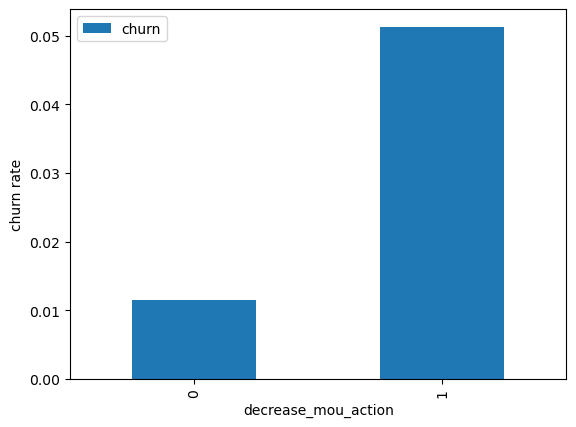

In [273]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis--We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.



### Churn rate on the basis whether the customer decreased her/his number of recharge in action month


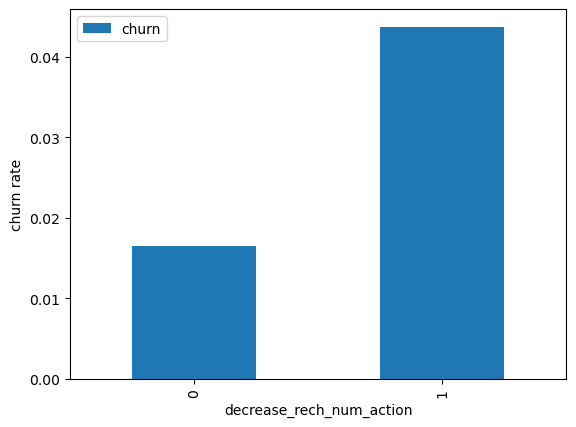

In [274]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis --- the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month


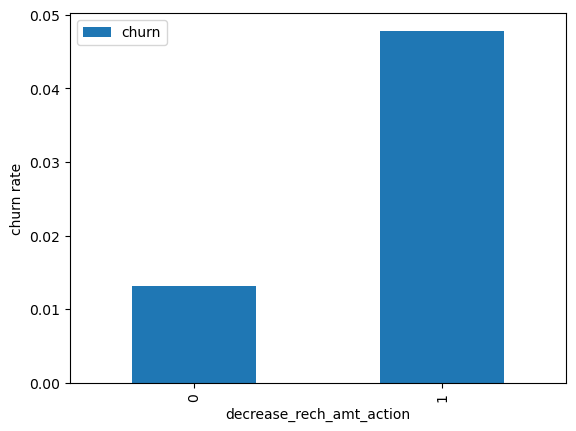

In [275]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis--- Churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

### Churn rate on the basis whether the customer decreased her/his volume based cost in action month


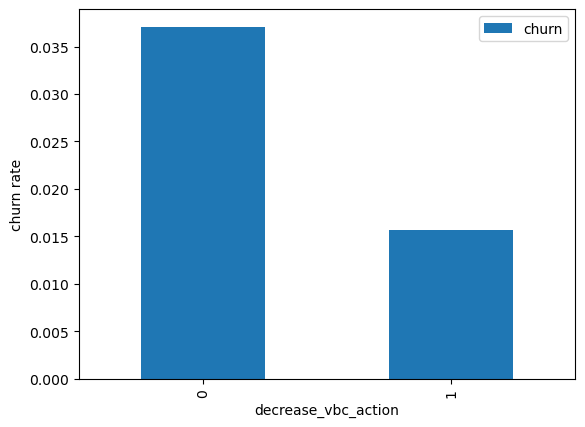

In [276]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis --- The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

### Analysis of the average revenue per customer (churn and not churn) in the action phase


In [277]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

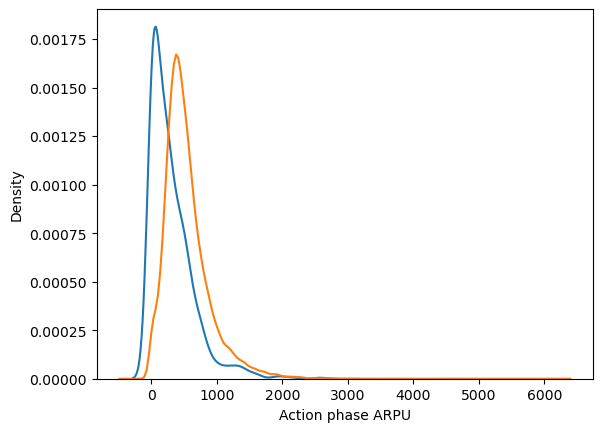

In [278]:
# Distribution plot
ax = sns.distplot(data_churn['total_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 100



### Analysis of the minutes of usage MOU (churn and not churn) in the action phase


[Text(0.5, 0, 'Action phase MOU')]

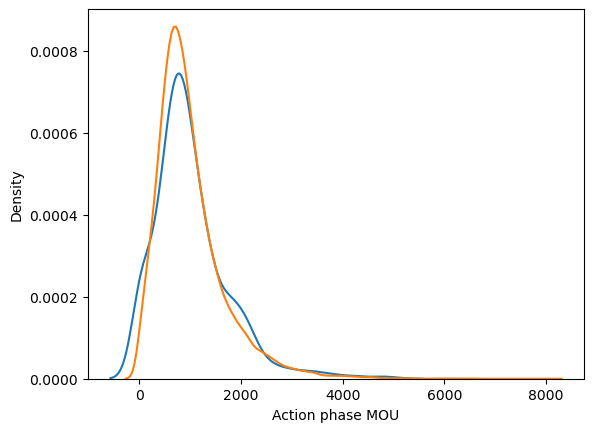

In [279]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.


### Bivariate analysis


Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase


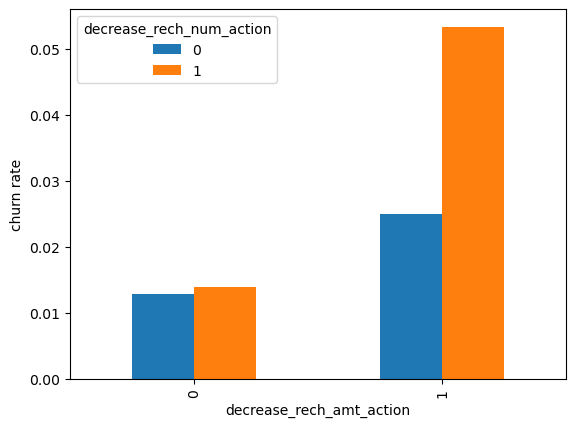

In [280]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis--Churn n rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phas



### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

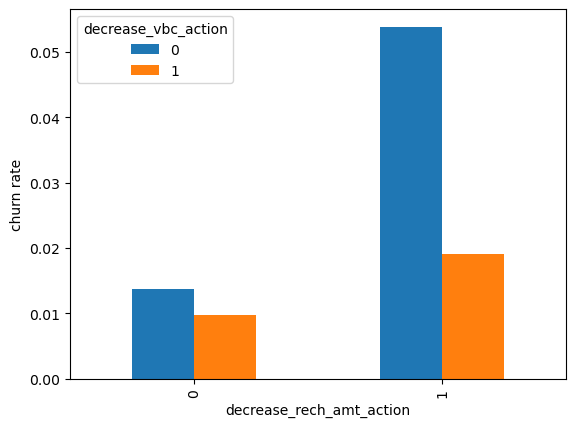

In [281]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Analysis ---  Churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

### Analysis of recharge amount and number of recharge in action month

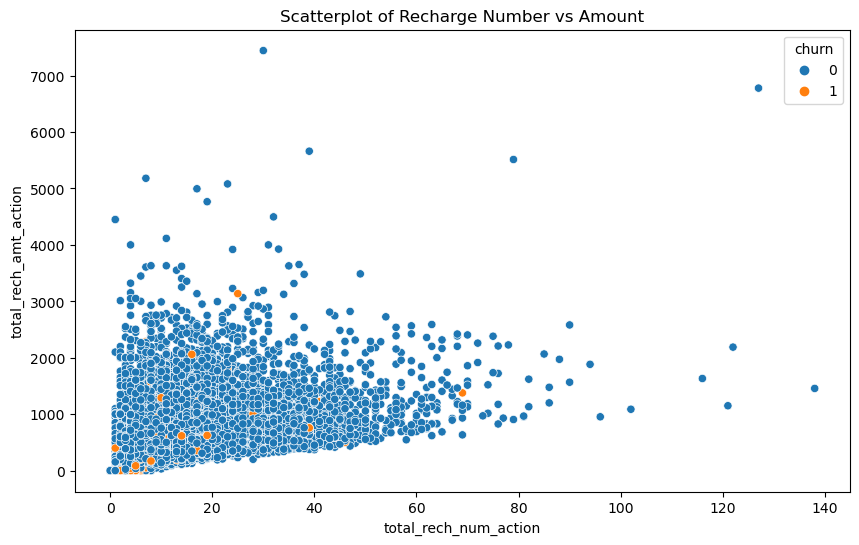

In [282]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='total_rech_num_action', y='total_rech_amt_action', hue='churn', data=data)
plt.title('Scatterplot of Recharge Number vs Amount')
plt.show()

Analysis --- R recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharg



### Dropping few derived columns, which are not required in further analysis


In [283]:
data = data.drop(['total_mou_good','total_mou_action','diff_mou','total_rech_num_action','diff_rech_num','total_rech_amt_action',
                 'diff_rech_amt','total_arpu_action','diff_arpu','total_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

### Train-Test Split


In [284]:
# Import library
from sklearn.model_selection import train_test_split

In [285]:
# Putting feature variables into X
X= data.drop(['mobile_number','churn'], axis=1)

In [286]:
# Putting target variable to y
y= data['churn']

In [287]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance


We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [288]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [289]:
# Instantiate SMOTE
smote = SMOTE()

In [290]:
# Use fit_resample instead of fit_sample
X_resampled, y_resampled = smote.fit_resample(X, y)

### Feature Scaling


In [291]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [292]:
# Instantiate the Scaler
scaler = StandardScaler()

In [293]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [294]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [295]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
76637,0.0,0.0,0.0,0.177042,-0.565237,-0.615403,0.342004,-0.607254,-0.528515,-0.153098,...,-0.146661,-0.509556,-0.324997,-0.338332,-0.032583,1,0,1,1,1
44417,0.0,0.0,0.0,-1.385359,4.245131,2.814453,-0.542001,-0.146232,-0.118059,-0.772620,...,-0.146661,-0.884874,-0.339808,-0.338332,-0.317058,0,0,0,0,0
77582,0.0,0.0,0.0,-0.185183,0.470514,0.439043,-0.475845,-0.539126,-0.408638,-0.320016,...,1.820414,1.181411,2.342626,1.965731,1.189782,0,1,0,0,0
48224,0.0,0.0,0.0,-0.871138,0.761096,0.363448,-0.592545,-0.594671,-0.522008,-0.787657,...,-0.146661,-1.025617,-0.339808,-0.338332,-0.317058,1,0,0,0,0
76321,0.0,0.0,0.0,0.307153,0.183378,0.873588,-0.192921,-0.085344,-0.012023,1.064736,...,-0.146661,-0.648260,-0.339808,-0.338332,-0.317058,0,0,0,0,0


### Scaling the test set


We don't fit scaler on the test set. We only transform the test set.


In [296]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.280204,-0.318483,0.630203,-0.619183,-0.637742,-0.538175,0.608858,...,1.820414,0.003445,-0.133609,0.020306,-0.317058,0,0,0,0,0
64892,0.0,0.0,0.0,0.084955,-0.814767,-0.500458,-0.629329,-0.646247,-0.560938,-0.314708,...,-0.146661,0.351226,1.677391,1.705824,4.389368,1,0,1,1,1
39613,0.0,0.0,0.0,0.580284,0.121878,1.016326,-0.401743,-0.455056,-0.298176,0.840667,...,-0.146661,2.402212,-0.339808,-0.338332,-0.317058,0,1,0,0,0
93118,0.0,0.0,0.0,0.675978,0.736183,-0.551999,0.150901,0.142507,-0.252783,-0.083998,...,-0.146661,1.331334,-0.339808,-0.338332,-0.317058,1,1,1,1,0
81235,0.0,0.0,0.0,3.901497,0.828475,2.319996,4.977103,1.683836,2.385666,0.075648,...,0.836877,-0.407568,-0.339808,-0.338332,-0.317058,1,1,0,0,0


### Model with PCA


In [297]:
#Import PCA
from sklearn.decomposition import PCA

In [298]:
# Instantiate PCA
pca = PCA(random_state=42)

In [299]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [300]:
# Principal components
pca.components_

array([[-3.16447611e-19, -1.11022302e-16, -1.11022302e-16, ...,
        -1.44218703e-02, -1.22846710e-02,  1.11287575e-02],
       [-1.55072194e-19,  0.00000000e+00,  5.55111512e-17, ...,
        -1.72203454e-02, -1.56779713e-02, -2.11453023e-02],
       [ 7.39644623e-20,  1.11022302e-16, -1.45716772e-16, ...,
        -1.91138286e-02, -1.96037975e-02,  4.27835644e-02],
       ...,
       [-0.00000000e+00,  1.03357366e-02, -4.93234673e-02, ...,
         2.16840434e-18,  5.46437895e-17,  9.80118764e-17],
       [ 9.99999159e-01,  1.26701347e-03,  2.24688001e-05, ...,
        -2.76471554e-18, -5.42101086e-20, -1.11401773e-17],
       [-0.00000000e+00, -1.50855696e-02, -9.72504429e-01, ...,
         2.08166817e-16,  2.77555756e-17,  1.31838984e-16]])

In [301]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09827196 0.18715482 0.24098274 0.288427   0.32808936 0.36619611
 0.39455135 0.42179689 0.44789168 0.47300336 0.49681218 0.51985738
 0.54155026 0.56275956 0.5824111  0.60093666 0.61737532 0.6321799
 0.64661904 0.66082865 0.67447539 0.68741526 0.69959394 0.71068572
 0.72134071 0.73154626 0.74146662 0.75119328 0.76029906 0.76872918
 0.77672285 0.78446027 0.79189818 0.79901462 0.80574855 0.81232056
 0.81881181 0.82519154 0.83147068 0.83756287 0.84362881 0.84946589
 0.85503829 0.86051633 0.86574209 0.87080195 0.87567732 0.88015457
 0.88447754 0.88867817 0.8927573  0.89662796 0.90045087 0.90417925
 0.90789085 0.9114486  0.91486825 0.91815822 0.92136641 0.92443958
 0.92740038 0.93030744 0.9331459  0.93596405 0.93872906 0.94146403
 0.94416632 0.94681924 0.94933577 0.95182645 0.95423977 0.95658683
 0.95889976 0.96101633 0.96305653 0.96508416 0.9670609  0.96899168
 0.97086791 0.97269964 0.97451962 0.97630114 0.97802254 0.97969386
 0.98133226 0.98293368 0.9845028  0.98599776 0.98738548 0.98864

Text(0, 0.5, 'Cumulative Variance')

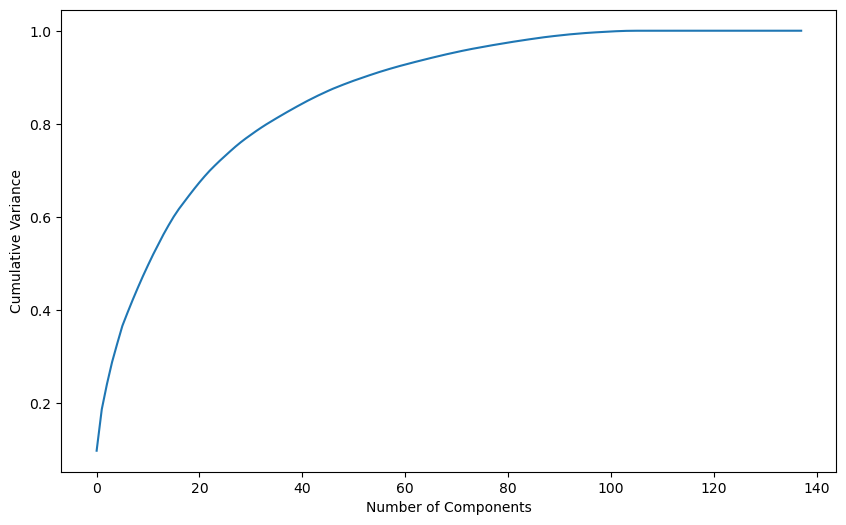

In [302]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can observe that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.


### Performing PCA with 60 components

In [303]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [304]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [305]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

### Applying transformation on the test set


We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.


In [306]:
X_test_pca = pca_final.transform(X_test)

### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

### Logistic regression with PCA


In [307]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [308]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Tuning hyperparameter C

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [309]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [310]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [311]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114324,0.007192,0.009120,0.000861,0.01,{'C': 0.01},0.035971,0.042683,0.048276,0.027586,...,0.036383,0.008239,6,0.041667,0.040000,0.042088,0.040404,0.040472,0.040926,0.000804
1,0.227022,0.012156,0.009340,0.000774,0.1,{'C': 0.1},0.057554,0.054878,0.048276,0.041379,...,0.047267,0.008590,5,0.058333,0.064348,0.065657,0.048822,0.057336,0.058899,0.005995
2,0.308018,0.013031,0.009571,0.000953,1,{'C': 1},0.064748,0.054878,0.048276,0.062069,...,0.054213,0.008723,4,0.068333,0.066087,0.069024,0.053872,0.064081,0.064279,0.005487
3,0.297333,0.017883,0.009372,0.000804,10,{'C': 10},0.064748,0.054878,0.055172,0.062069,...,0.055593,0.008205,1,0.068333,0.064348,0.069024,0.053872,0.065767,0.064269,0.005468
4,0.306257,0.019229,0.008739,0.001843,100,{'C': 100},0.064748,0.054878,0.055172,0.062069,...,0.055593,0.008205,1,0.070000,0.064348,0.069024,0.053872,0.065767,0.064602,0.005749
5,0.301681,0.011038,0.008320,0.000500,1000,{'C': 1000},0.064748,0.054878,0.055172,0.062069,...,0.055593,0.008205,1,0.070000,0.064348,0.069024,0.053872,0.065767,0.064602,0.005749


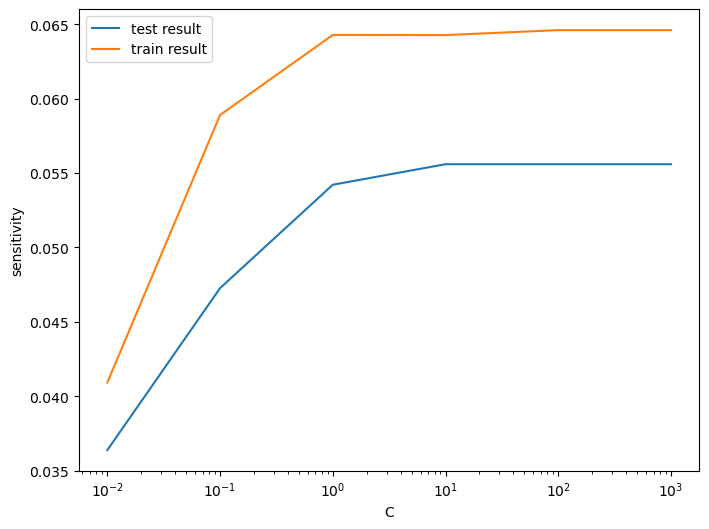

In [312]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [313]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.05559270398812809 at C = 10


### Logistic regression with optimal C


In [314]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [315]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

## Prediction on the train set


In [316]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [317]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21381    44]
 [  696    43]]


In [318]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [319]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666125248150154
Sensitivity:- 0.058186738836265225
Specificity:- 0.9979463243873979


### Prediction on the test set


In [320]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [321]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5335   13]
 [ 180   13]]


In [322]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [323]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.06735751295336788
Specificity:- 0.9975691847419597


### Model summary


Train Test	

Accuracy	96%
Sensitivity	7%
Specificity	99%
	
Tes
Set	
Accuracy	96%
Sensitivity	8%
Specifiity	99%


### Support Vector Machine(SVM) with PCA


In [324]:
# Importing SVC
from sklearn.svm import SVC


Hyperparameter tuning
C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [325]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [326]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.901035,0.161283,4.721801,0.108916,1,0.01,"{'C': 1, 'gamma': 0.01}",0.966838,0.966838,0.966973,0.966883,0.000064,1,0.967447,0.967921,0.967921,0.967763,0.000223
1,4.367256,0.165535,2.994029,0.048984,1,0.001,"{'C': 1, 'gamma': 0.001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
2,2.640596,0.107155,2.668221,0.018641,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
3,5.758619,0.065174,4.328055,0.080038,10,0.01,"{'C': 10, 'gamma': 0.01}",0.966432,0.965214,0.965620,0.965755,0.000506,9,0.976922,0.977328,0.978005,0.977418,0.000447
4,4.655200,0.222681,2.925524,0.073101,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966567,0.966838,0.966432,0.966613,0.000169,4,0.967244,0.967244,0.967447,0.967312,0.000096
5,5.847576,0.595438,2.830989,0.182570,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.966703,0.966703,0.966432,0.966613,0.000128,4,0.966635,0.966635,0.966770,0.966680,0.000064
6,5.941647,0.203241,3.438762,0.089148,100,0.01,"{'C': 100, 'gamma': 0.01}",0.958852,0.955739,0.958175,0.957589,0.001337,11,0.990254,0.990525,0.990119,0.990300,0.000169
7,6.436654,0.400788,2.909300,0.060607,100,0.001,"{'C': 100, 'gamma': 0.001}",0.966432,0.966838,0.966161,0.966477,0.000278,6,0.969545,0.970425,0.970560,0.970177,0.000450
8,7.756649,1.007998,2.635657,0.026956,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966703,0.966703,0.965891,0.966432,0.000383,7,0.966635,0.966770,0.966906,0.966770,0.000111
9,7.638876,0.382171,3.036384,0.020440,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.946941,0.947482,0.948430,0.947618,0.000615,12,0.998917,0.998240,0.998782,0.998646,0.000292


### Plotting the accuracy with various C and gamma values


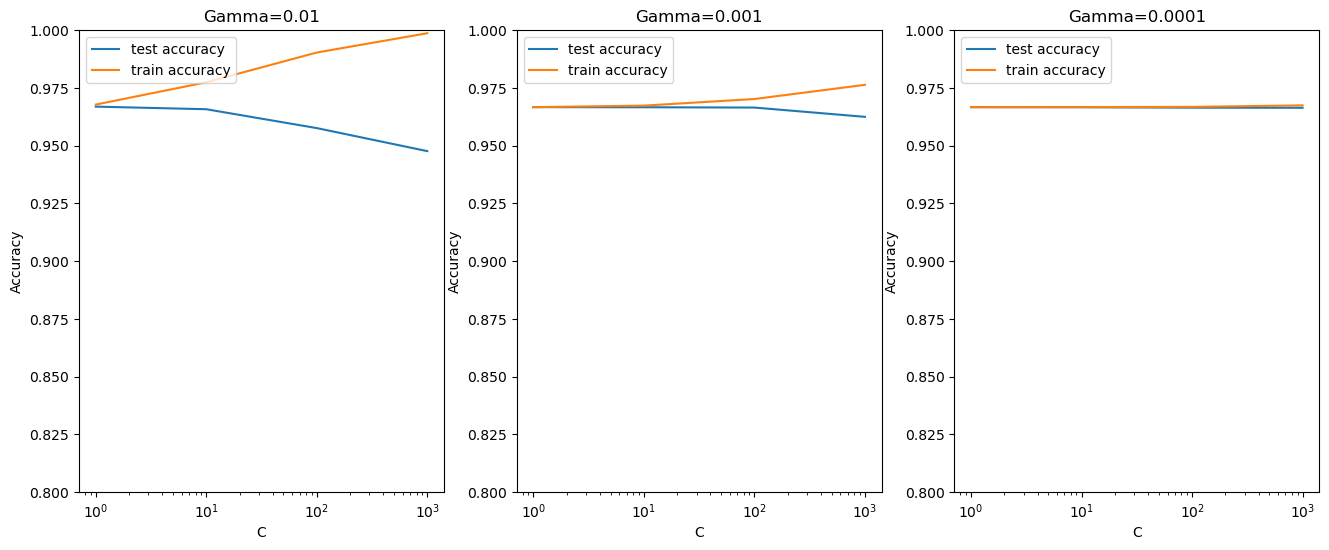

In [327]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [328]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.966883234073272 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

High gamma (i.e. high non-linearity) and average value of C
Low gamma (i.e. less non-linearity) and high value of C
We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Build the model with optimal hyperparameters


In [329]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

### Prediction on the train set


In [330]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [331]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  737     2]]


In [332]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [333]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9667478794441436
Sensitivity:- 0.0027063599458728013
Specificity:- 1.0


## Prediction on the test set


In [334]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [335]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [336]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [337]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


## Model summary



Train Test	
Accuracy	96%
Sensitivity	0%
Specificity	1%
	
Test Set	
Accuracy	96%
Sensitivity	0%
Specificity	1%


### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of appor 96.5%



### Without PCA


Logistic regression with No PCA

In [338]:
##### Importing stats model
import statsmodels.api as sm

In [339]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [340]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [341]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22034
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Oct 2024   Deviance:                       4055.3
Time:                        22:11:06   Pearson chi2:                 2.24e+05
No. Iterations:                    55   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -89.5132   8360.712     -0.011      0.991   -1.65e+04    1.63e+04
loc_og_t2o_mou            1.971e-07      5e-05      0.004      0.997   -9.78e-05    9.82e-05
std_og_t2o_mou           -2.185e-06      0.000     -0.010      0.992      -0.000       0.000
loc_ic_t2o_mou             1.57e-06      0.000      0.013      0.990      -0.000       0.000
arpu_6                      -0.0635      0.153     -0.414      0.679      -0.364       0.237
arpu_7                       0.0872      0.174      0.500      0.617      -0.254       0.429
arpu_8                       0.0765      0.241      0.318      0.751      -0.396       0.549
onnet_mou_6                  5.6087      6.252      0.897      0.370      -6.645      17.862
onnet_mou_7                  2.1496      3.783      0.568      0.570      -5.265       9.564
onnet_mou_8                 -4.3224      4.519     -0.956      0.339     -13.180       4.535
offnet_mou_6                 5.8977      6.187      0.953      0.340      -6.229      18.025
offnet_mou_7                 2.7764      3.689      0.753      0.452      -4.453      10.006
offnet_mou_8                -5.3761      4.628     -1.162      0.245     -14.448       3.696
roam_ic_mou_6                0.0780      0.041      1.886      0.059      -0.003       0.159
roam_ic_mou_7               -0.0322      0.047     -0.690      0.490      -0.124       0.059
roam_ic_mou_8                0.0450      0.039      1.164      0.245      -0.031       0.121
roam_og_mou_6               -1.3401      1.507     -0.889      0.374      -4.294       1.613
roam_og_mou_7               -0.3752      0.713     -0.526      0.599      -1.773       1.023
roam_og_mou_8                1.0064      0.938      1.072      0.284      -0.833       2.846
loc_og_t2t_mou_6         -1908.6828   1907.613     -1.001      0.317   -5647.536    1830.171
loc_og_t2t_mou_7          -259.5890   2037.880     -0.127      0.899   -4253.760    3734.582
loc_og_t2t_mou_8          4889.7350   2220.917      2.202      0.028     536.817    9242.653
loc_og_t2m_mou_6         -1938.1523   1936.482     -1.001      0.317   -5733.587    1857.283
loc_og_t2m_mou_7          -239.6452   1876.968     -0.128      0.898   -3918.436    3439.145
loc_og_t2m_mou_8          4883.3286   2217.896      2.202      0.028     536.333    9230.324
loc_og_t2f_mou_6          -172.2062    172.121     -1.000      0.317    -509.557     165.145
loc_og_t2f_mou_7           -22.3279    174.496     -0.128      0.898    -364.334     319.678
loc_og_t2f_mou_8           435.3907    197.938      2.200      0.028      47.439     823.342
loc_og_t2c_mou_6             0.0236      0.042      0.566      0.571      -0.058       0.105
loc_og_t2c_mou_7             0.0239      0.047      0.505      0.613      -0.069       0.116
loc_og_t2c_mou

### Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.

## Feature Selection Using RFE


In [342]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

## RFE with 15 columns


In [343]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg,n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [344]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)


Index(['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_7', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8'],
      dtype='object')


### Model-1 with RFE selected columns


In [345]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22148
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Oct 2024   Deviance:                       4548.5
Time:                        22:12:04   Pearson chi2:                 2.25e+06
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -89.8874   8158.421     -0.011      0.991   -1.61e+04    1.59e+04
offnet_mou_7         1.2601      0.173      7.277      0.000       0.921       1.599
loc_og_t2m_mou_7    -0.7593      0.142     -5.342      0.000      -1.038      -0.481
loc_og_t2f_mou_8    -1.0922      0.363     -3.011      0.003      -1.803      -0.381
loc_og_mou_8        -0.9819      0.281     -3.499      0.000      -1.532      -0.432
std_og_t2m_mou_7    -0.9070      0.161     -5.630      0.000      -1.223      -0.591
isd_og_mou_8        -1.6307      1.082     -1.507      0.132      -3.752       0.491
og_others_8      -4345.7126   4.27e+05     -0.010      0.992   -8.42e+05    8.33e+05
total_og_mou_8      -0.6784      0.073     -9.354      0.000      -0.821      -0.536
loc_ic_t2m_mou_8    -0.9032      0.607     -1.487      0.137      -2.094       0.287
loc_ic_t2f_mou_8    -0.9618      0.426     -2.256      0.024      -1.797      -0.126
loc_ic_mou_8        -1.3289      0.737     -1.803      0.071      -2.773       0.116
total_ic_mou_8      -1.1255      0.338     -3.334      0.001      -1.787      -0.464
spl_ic_mou_8        -0.6606      0.134     -4.925      0.000      -0.923      -0.398
ic_others_8         -1.4216      0.602     -2.363      0.018      -2.601      -0.242
vol_3g_mb_8         -1.3204      0.188     -7.011      0.000      -1.690      -0.951
====================================================================================
"""

Checking VIFs


In [346]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [347]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,offnet_mou_7,51.29
4,std_og_t2m_mou_7,44.39
1,loc_og_t2m_mou_7,15.15
10,loc_ic_mou_8,8.21
11,total_ic_mou_8,5.29
8,loc_ic_t2m_mou_8,3.82
3,loc_og_mou_8,2.49
7,total_og_mou_8,1.86
9,loc_ic_t2f_mou_8,1.28
2,loc_og_t2f_mou_8,1.25


### Removing column oloc_ic_t2m_mou_8 & isd_og_mou_8  which is insignificatnt as it has the higher p-value(value > 0.05)

In [355]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('loc_ic_t2m_mou_8')
log_cols.remove('isd_og_mou_8')
print(log_cols)

['offnet_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'vol_3g_mb_8']


### Model-2

Building the model after removing oloc_ic_t2m_mou_8 variable

In [356]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22150
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Oct 2024   Deviance:                       4568.1
Time:                        22:17:05   Pearson chi2:                 3.11e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -89.7272   8197.572     -0.011      0.991   -1.62e+04     1.6e+04
offnet_mou_7         1.2471      0.173      7.202      0.000       0.908       1.586
loc_og_t2m_mou_7    -0.7610      0.142     -5.369      0.000      -1.039      -0.483
loc_og_t2f_mou_8    -1.1469      0.366     -3.137      0.002      -1.863      -0.430
loc_og_mou_8        -0.9705      0.281     -3.452      0.001      -1.522      -0.419
std_og_t2m_mou_7    -0.8912      0.161     -5.534      0.000      -1.207      -0.576
og_others_8      -4341.9366   4.29e+05     -0.010      0.992   -8.46e+05    8.37e+05
total_og_mou_8      -0.6703      0.073     -9.240      0.000      -0.812      -0.528
loc_ic_t2f_mou_8    -0.8792      0.427     -2.060      0.039      -1.716      -0.043
loc_ic_mou_8        -2.1151      0.471     -4.489      0.000      -3.039      -1.192
total_ic_mou_8      -1.2348      0.343     -3.595      0.000      -1.908      -0.562
spl_ic_mou_8        -0.6588      0.134     -4.918      0.000      -0.921      -0.396
ic_others_8         -1.4788      0.608     -2.432      0.015      -2.671      -0.287
vol_3g_mb_8         -1.3163      0.188     -6.992      0.000      -1.685      -0.947
====================================================================================
"""

## Checking VIF for Model-2


In [357]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_mou_7,50.74
4,std_og_t2m_mou_7,43.88
1,loc_og_t2m_mou_7,14.89
8,loc_ic_mou_8,5.76
9,total_ic_mou_8,5.27
3,loc_og_mou_8,2.48
6,total_og_mou_8,1.86
7,loc_ic_t2f_mou_8,1.26
2,loc_og_t2f_mou_8,1.25
11,ic_others_8,1.04


In [354]:
log_cols

['offnet_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'ic_others_8',
 'vol_3g_mb_8']

In [359]:
# Removing std_og_t2t_mou_8 , onnet_mou_8, loc_ic_mou_8, total_ic_mou_8 columns.
log_cols.remove('std_og_t2m_mou_7')
log_cols.remove('offnet_mou_7')
log_cols.remove('loc_og_t2m_mou_7')
log_cols.remove('loc_ic_mou_8')

As we can see from the model summary that std_og_t2t_mou_8, 
onnet_mou_, 
loc_ic_mou 8
total_ic_mo having VIF greater than5.
Hence removing these attributesu_8


### Model-3


Model after removing ostd_og_t2t_mou_8, onnet_mou_8, loc_ic_mou_8 , total_ic_mou_8

In [360]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                22164
Model:                            GLM   Df Residuals:                    22154
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Oct 2024   Deviance:                       4685.9
Time:                        22:19:08   Pearson chi2:                 3.38e+08
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -90.2640   8194.236     -0.011      0.991   -1.62e+04     1.6e+04
loc_og_t2f_mou_8    -1.0550      0.365     -2.892      0.004      -1.770      -0.340
loc_og_mou_8        -1.7416      0.257     -6.783      0.000      -2.245      -1.238
og_others_8      -4368.0225   4.29e+05     -0.010      0.992   -8.45e+05    8.37e+05
total_og_mou_8      -0.5129      0.064     -8.063      0.000      -0.638      -0.388
loc_ic_t2f_mou_8    -1.2927      0.439     -2.944      0.003      -2.153      -0.432
total_ic_mou_8      -2.7456      0.266    -10.329      0.000      -3.267      -2.225
spl_ic_mou_8        -0.6564      0.134     -4.914      0.000      -0.918      -0.395
ic_others_8         -1.3967      0.612     -2.283      0.022      -2.596      -0.198
vol_3g_mb_8         -1.3848      0.189     -7.312      0.000      -1.756      -1.014
====================================================================================
"""

### VIF Model-3

In [361]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_mou_8,1.46
5,total_ic_mou_8,1.31
3,total_og_mou_8,1.24
4,loc_ic_t2f_mou_8,1.22
0,loc_og_t2f_mou_8,1.16
7,ic_others_8,1.02
2,og_others_8,1.01
6,spl_ic_mou_8,1.01
8,vol_3g_mb_8,1.01


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

### Hence, we can conclused that Model-3 log_no_pca_3 will be the final model

## Model performance on the train set


In [362]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

76637    1.023807e-01
44417    5.371444e-03
77582    4.582270e-04
48224    1.036005e-03
76321    2.917926e-17
dtype: float64

Creating a dataframe with the actual churn and the predicted probabilities


In [364]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,1.023807e-01,0
1,0,5.371444e-03,1
2,0,4.582270e-04,2
3,0,1.036005e-03,3
4,0,2.917926e-17,4


## Finding Optimal Probablity Cutoff Point


In [365]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.023807e-01,0,1,1,0,0,0,0,0,0,0,0
1,0,5.371444e-03,1,1,0,0,0,0,0,0,0,0,0
2,0,4.582270e-04,2,1,0,0,0,0,0,0,0,0,0
3,0,1.036005e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,2.917926e-17,4,1,0,0,0,0,0,0,0,0,0


### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.


In [366]:
# Creating a dataframe
cutoff_telecom = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_telecom.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_telecom)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.037899     1.000000     0.004714
0.1          0.1  0.899702     0.713126     0.906138
0.2          0.2  0.955423     0.539919     0.969755
0.3          0.3  0.966658     0.000000     1.000000
0.4          0.4  0.966658     0.000000     1.000000
0.5          0.5  0.966658     0.000000     1.000000
0.6          0.6  0.966658     0.000000     1.000000
0.7          0.7  0.966658     0.000000     1.000000
0.8          0.8  0.966658     0.000000     1.000000
0.9          0.9  0.966658     0.000000     1.000000


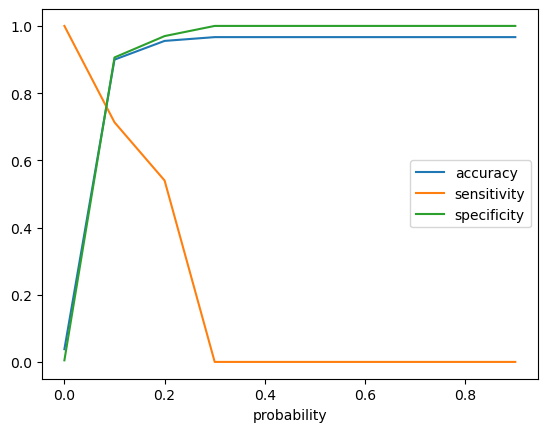

In [367]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_telecom.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [368]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,1.023807e-01,0,1,1,0,0,0,0,0,0,0,0,0
1,0,5.371444e-03,1,1,0,0,0,0,0,0,0,0,0,0
2,0,4.582270e-04,2,1,0,0,0,0,0,0,0,0,0,0
3,0,1.036005e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,2.917926e-17,4,1,0,0,0,0,0,0,0,0,0,0


In [369]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[21425     0]
 [  739     0]]


In [370]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [371]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9666576430247248
Sensitivity:- 0.0
Specificity:- 1.0


### Plotting the ROC Curve (Trade off between sensitivity & specificity)


In [372]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

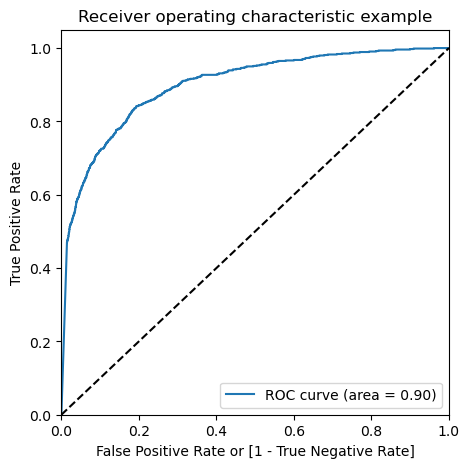

In [373]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])


We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.



## Testing the model on the test set


In [374]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [375]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [376]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

### Predictions on the test set with final model


In [377]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [378]:
y_test_pred.head()

5704     0.003429
64892    0.003594
39613    0.000149
93118    0.001680
81235    0.000200
dtype: float64

In [379]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.003429
64892,0.003594
39613,0.000149
93118,0.001680
81235,0.000200


In [380]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [381]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [382]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [383]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [384]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.003429
1,0,64892,0.003594
2,0,39613,0.000149
3,0,93118,0.001680
4,0,81235,0.000200


In [385]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [386]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=['CustID', 'churn', 'churn_prob'])

In [387]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.003429
1,64892,0,0.003594
2,39613,0,0.000149
3,93118,0,0.001680
4,81235,0,0.000200


In [388]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [389]:
y_test_pred_final.head()


,CustID,churn,churn_prob,test_predicted
0,5704,0,0.003429,0
1,64892,0,0.003594,0
2,39613,0,0.000149,0
3,93118,0,0.001680,0
4,81235,0,0.000200,0


### Metrics


In [390]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[5348    0]
 [ 193    0]]


In [391]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [392]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


### Model summary



Train Test	
Accuracy	96%
Sensitivity	0%
Specificity	1%
	
Test Set	
Accuracy	96%
Sensitivity	0%
Specificity	1%


Overall, the model is performing well in the test set, what it had learnt from the train set.



## Final conclusion with no PCA


We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

#### Business recomendation


Below are few top variables selected in the logistic regression model.



1.Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

2.Target the customers, whose outgoing others charge in July and incoming others on August are less.

3.Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

4.Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.

5.Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.

6.Cutomers decreasing monthly 2g usage for August are most probable to churn.

7.Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to c churn.


### Plots of important predictors for churn and non churn customers


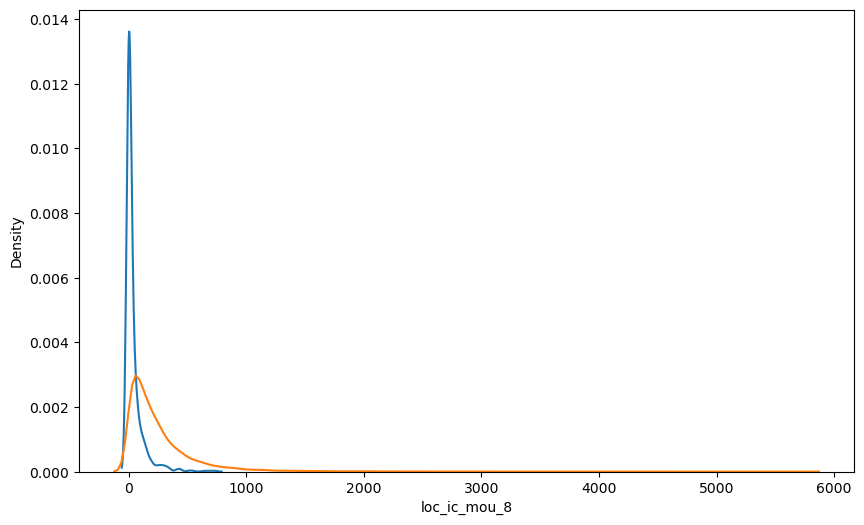

In [393]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.



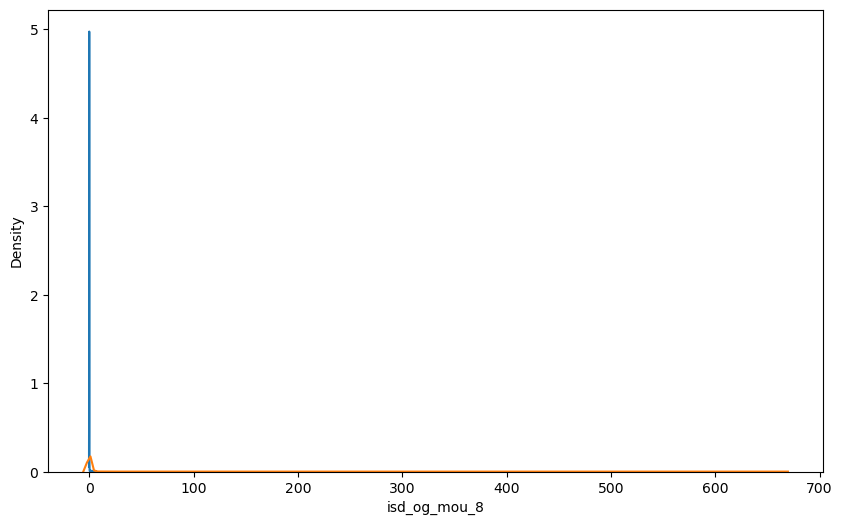

In [394]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()


We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.



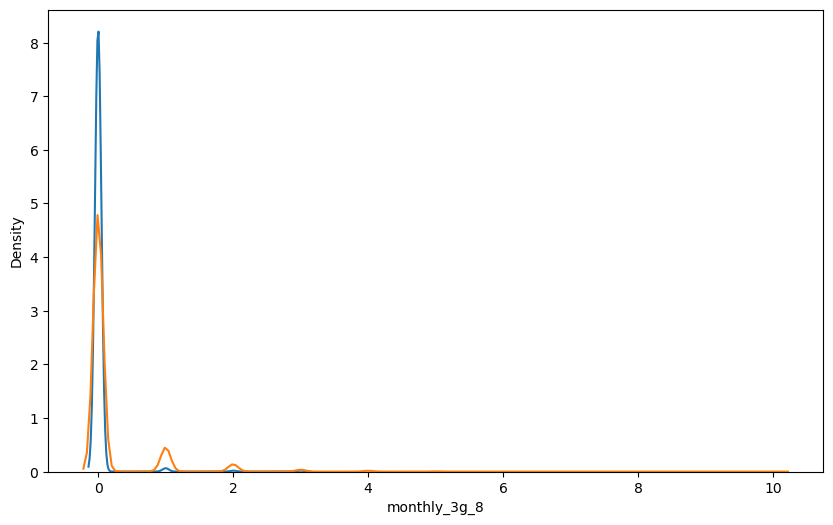

In [395]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()


The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

